In [1]:
from mitotic_classifer import *


# Running SVM model with file:230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#
## check the number of M and G2 cells


In [2]:
df_ori=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_final_data.csv')
df_cellcyle=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_singlecell_cellcycle.csv')
df_cellcyle.groupby('cell_cycle_detailed').count()

,Unnamed: 0,experiment,plate_id,well,well_id,image_id,cell_line,condition,Cyto_ID,area_cell,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,3559,3559,3559,3559,3559,3559,3559,3559,3559,3559,...,3559,3559,3559,3559,3559,3559,3559,3559,3559,3559
G1,32864,32864,32864,32864,32864,32864,32864,32864,32864,32864,...,32864,32864,32864,32864,32864,32864,32864,32864,32864,32864
G2,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618,...,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618
Late S,2309,2309,2309,2309,2309,2309,2309,2309,2309,2309,...,2309,2309,2309,2309,2309,2309,2309,2309,2309,2309
M,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
Polyploid,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,...,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549
Polyploid (replicating),208,208,208,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,208,208,208
Sub-G1,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203


## Merge two files

In [3]:
df_all=merge_data(df1=df_ori,df2=df_cellcyle,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,3551,3551,3551,3551,3551,3551,3551,3551,3551,3551,...,3551,3551,3551,3551,3551,3551,3551,3551,3551,3551
G1,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713,...,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713
G2,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800,...,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800
Late S,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215,...,2215,2215,2215,2215,2215,2215,2215,2215,2215,2215
M,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
Polyploid,908,908,908,908,908,908,908,908,908,908,...,908,908,908,908,908,908,908,908,908,908
Polyploid (replicating),116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
Sub-G1,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


In [4]:
data=pd.concat([df_all[df_all['cell_cycle_detailed']=="M"],df_all[df_all['cell_cycle_detailed']=="G2"].head(72)])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed']].sample(frac=1).reset_index(drop=True)
data


,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_cyto,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed
0,RPE-1,NT,117.0,106.0,2.260914e+06,2.260914e+06,38757.289000,5241.986616,38757.289000,21329.378045,...,19569.024923,7489.190885,22628.014726,1,692,3.787163,1.090397,0.501887,0.699529,M
1,RPE-1,DMSO,121.0,194.0,2.039917e+06,2.039917e+06,18548.368124,3667.250557,18548.368124,10515.037003,...,9933.582657,5720.781475,10598.723068,1,776,3.416981,1.005590,0.562810,1.280270,G2
2,RPE-1,DMSO,51.0,376.0,2.610791e+06,2.610791e+06,10112.588980,2185.412667,10112.588980,6943.592677,...,14554.223271,6968.253443,10808.838906,1,2499,4.373228,0.945728,1.812451,2.481349,G2
3,RPE-1,Palb_12h,35.0,157.0,2.386580e+06,2.386580e+06,23059.675531,5097.578627,23059.675531,15201.148211,...,23784.560876,9981.391463,20393.179592,1,730,3.997662,1.079460,0.529447,1.036095,M
4,RPE-1,DMSO,73.0,225.0,2.433586e+06,2.433586e+06,15289.730177,2850.472307,15289.730177,10815.939790,...,13067.699242,7817.292479,11924.003322,1,1413,4.076400,0.965645,1.024807,1.484850,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,RPE-1,1NM_12h,140.0,294.0,2.769129e+06,2.769129e+06,17176.667250,2672.314307,17176.667250,9418.806105,...,11925.805541,6021.651815,9435.926036,1,1518,4.638453,1.020750,1.100961,1.940204,M
140,RPE-1,TAK931_24h,57.0,126.0,2.803581e+06,2.803581e+06,53736.177969,8783.720415,53736.177969,22250.645479,...,26635.993531,9939.221656,28246.585749,1,443,4.696163,1.279594,0.321295,0.831516,M
141,RPE-1,DMSO,84.0,267.0,2.620028e+06,2.620028e+06,13890.397893,2549.782175,13890.397893,9812.837437,...,14169.696625,6871.896902,15653.974467,1,1760,4.388700,1.011403,1.276476,1.762022,G2
142,RPE-1,DMSO,187.0,79.0,2.051337e+06,2.051337e+06,51635.010092,7373.355323,51635.010092,25966.289396,...,17495.137756,8031.974242,19670.699138,1,415,3.436109,1.064509,0.300987,0.521347,M


# pre-trained SVM
# without Edu

accuracy 0.8402777777777778


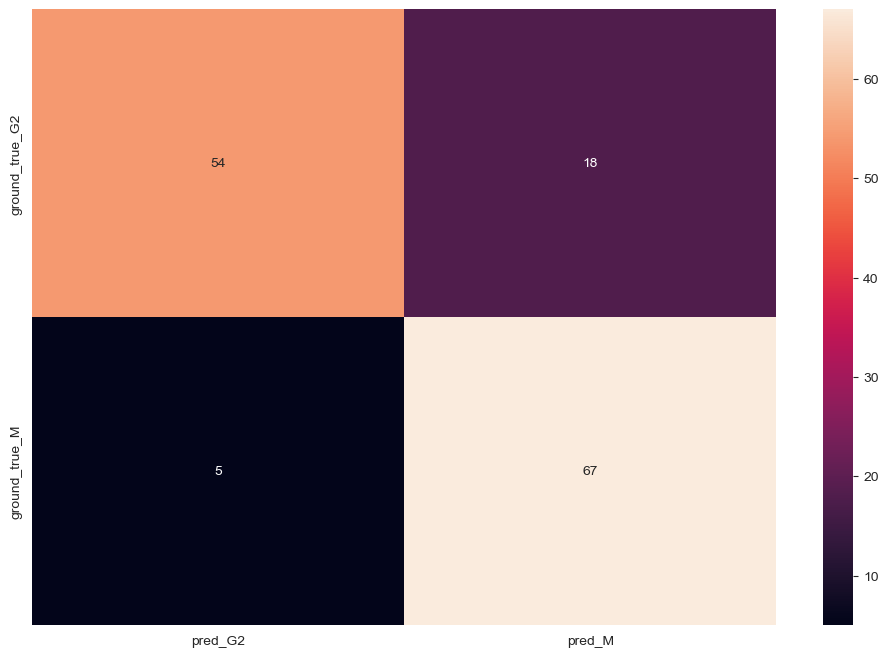

In [5]:


check_pretrained_model(data=data,pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')


# include EdU

accuracy 0.8263888888888888


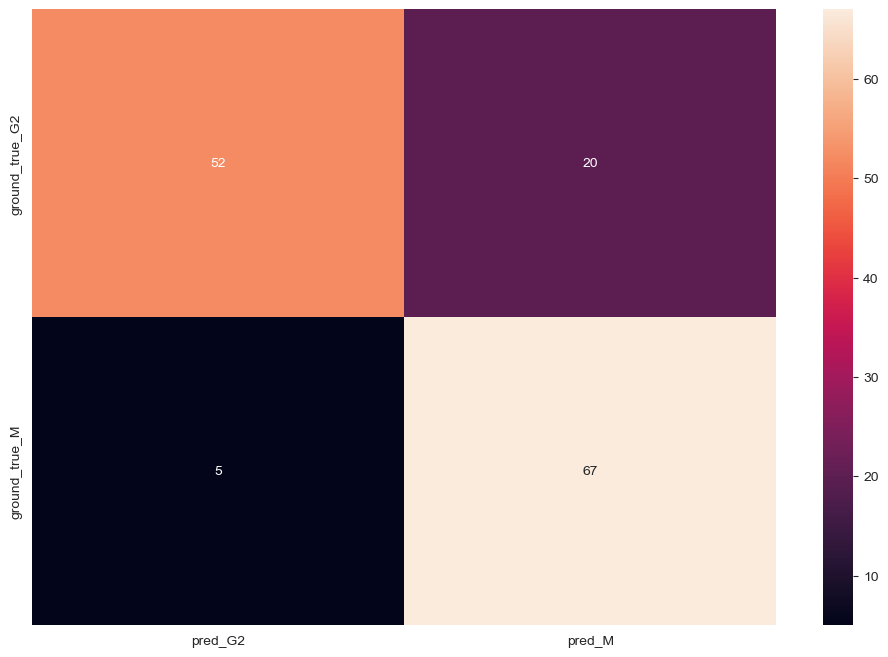

In [6]:
check_pretrained_model(data,pretrained_svm='pretrained_SVM_U20S_with_edu.joblib',features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')

# classification  of G1 S and G2/M
# without Edu

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.805026   0.79462738 0.79184735 0.78751084 0.78924545 0.80225499
 0.8074588  0.8057242  0.80138768 0.78143972]  Mean:0.7966522416843409


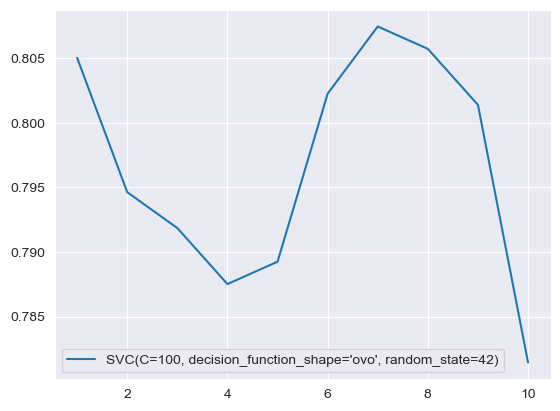

the accuracy of model run with train data 0.8407041276448144
the accuracy of model run with test data 0.7944849115504683


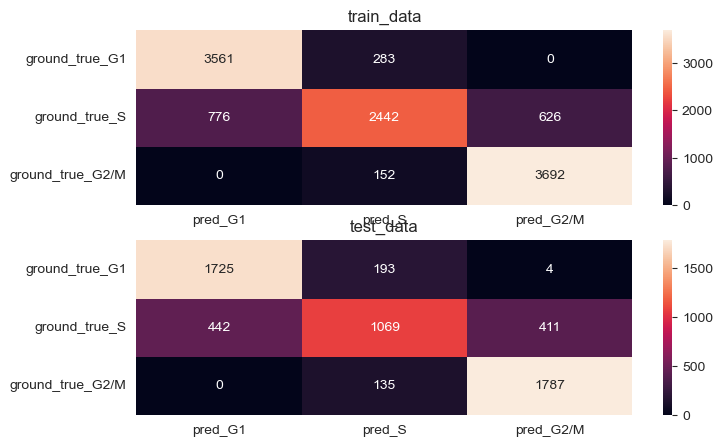

In [7]:
data_G1_S_G2_M=pd.concat([df_all[df_all['cell_cycle']=="G2/M"].head(5766),df_all[df_all['cell_cycle_detailed']=="G1"].head(5766),df_all[df_all['cell_cycle']=="S"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI', 'area_cell', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'intensity_max_Tub_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell',
       'intensity_mean_Tub_cell', 'intensity_max_Tub_cyto',
       'intensity_mean_Tub_cyto',
       'nuclei_count', 'DAPI_total',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle']].sample(frac=1).reset_index(drop=True)



x_train,x_test,y_train,y_test=preprecess_classifier(data_G1_S_G2_M,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle')
clf_svm_hp=svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier_G1_S_G2M(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)


# with Edu

the selected model: SVC(C=100, decision_function_shape='ovo', random_state=42)  Score:[0.98786828 0.98873484 0.98612316 0.98525585 0.98785776 0.98699046
 0.98872507 0.98785776 0.98785776 0.98785776]  Mean:0.9875128705013371


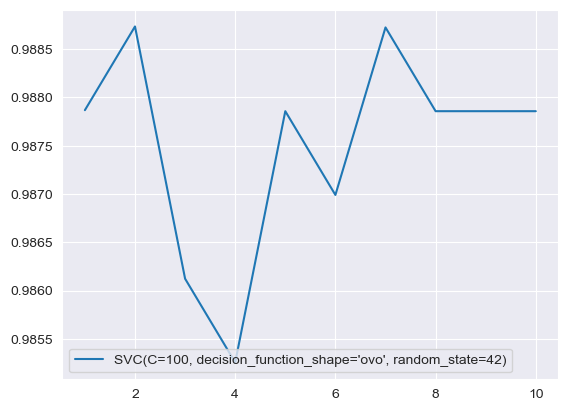

the accuracy of model run with train data 0.9995664238640305
the accuracy of model run with test data 0.9876864377384669


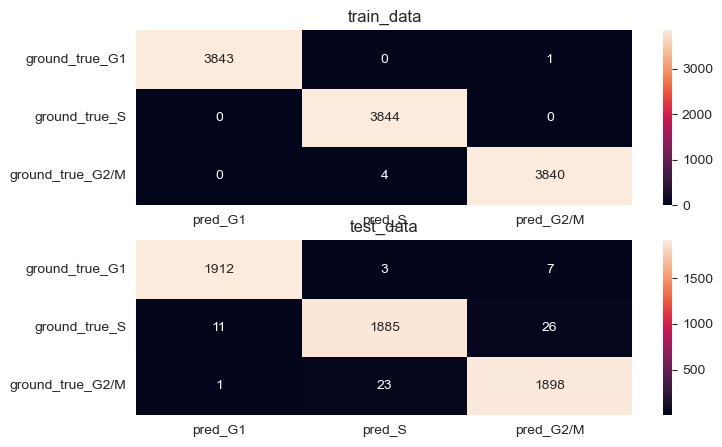

In [8]:
x_train,x_test,y_train,y_test=preprecess_classifier(data_G1_S_G2_M,features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'DAPI_total_norm',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle')
clf_svm_hp=svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
check_classifier_G1_S_G2M(clf=clf_svm_hp,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
